# 1.

In [1]:
import numpy as np
import numpy.linalg as la
import scipy
import sklearn
from sklearn.utils.extmath import randomized_svd

n = 2000
k = 2
A = np.random.normal(size=(n, n))

In [2]:
def get_svd(A, k):
  u, s, vt = la.svd(A)
  return u[:,:k] @ np.diag(s[:k]) @ vt[:k, :]

def get_svds(A, k):
  u, s, vt = scipy.sparse.linalg.svds(A, k=k)
  return u @ np.diag(s) @ vt

def get_rsvd(A, k):
   u, s, vt = randomized_svd(A, k)
   return u @ np.diag(s) @ vt

In [3]:
%timeit -n 4 get_svd(A, k)
%timeit -n 4 get_svds(A, k)
%timeit -n 4 get_rsvd(A, k)

6.78 s ± 148 ms per loop (mean ± std. dev. of 7 runs, 4 loops each)
1.47 s ± 164 ms per loop (mean ± std. dev. of 7 runs, 4 loops each)
338 ms ± 50.4 ms per loop (mean ± std. dev. of 7 runs, 4 loops each)


In [4]:
A_svd = get_svd(A, k)
A_svds = get_svds(A, k)
A_rsvd = get_rsvd(A, k)

In [5]:
print(f"A_svd Frobenius norm: {la.norm(A - A_svd, ord='fro')}")
print(f"A_svd Frobenius norm: {la.norm(A - A_svds, ord='fro')}")
print(f"A_svd Frobenius norm: {la.norm(A - A_rsvd, ord='fro')}")

A_svd Frobenius norm: 1994.438424634066
A_svd Frobenius norm: 1994.4384246340658
A_svd Frobenius norm: 1994.6249486280299


1. Error norms for *numpy.linalg.svd* and *sparse.linalg.svds* are the same because they compute the same values. But *numpy.linalg.svd* is much slower because it computes all single values and vectors, whereas *sparse.linalg.svds*  - only 2.

2. Error norm for *randomized_svd* differes from other two methods because *randomized_svd* is not an exact method. It uses random matrixes to perfom SVD. So it is faster, but less precise.

# 2

1. $(A^TA)^{-1} = ((U \Sigma V^T)^T U \Sigma V^T)^{-1} = (V \Sigma ^T U^T U \Sigma V^T)^{-1} = (V \Sigma ^T \Sigma V^T)^{-1} =  (V^T)^{-1}(\Sigma ^T \Sigma)^{-1} V^{-1} =  V (\Sigma ^T \Sigma)^{-1} V^T$

2. $ (A^TA)^{-1} A^T = V (\Sigma ^T \Sigma)^{-1} V^T (U \Sigma V^T)^T = V (\Sigma ^T \Sigma)^{-1} V^T V \Sigma^T U^T = V \Sigma^{-1} (\Sigma ^T) ^{-1}\Sigma^T U^T = V \Sigma^{-1} U^T$

3. $A(A^TA)^{-1} = U \Sigma V^T V (\Sigma ^T \Sigma)^{-1} V^T = U \Sigma \Sigma^{-1} (\Sigma ^T)^{-1}V^T = U(\Sigma ^T)^{-1}V^T $

4. $A(A^TA)^{-1}A^T = U \Sigma V^T V (\Sigma ^T \Sigma)^{-1} V^T V \Sigma^TU^T = UU^T = I $

# 3

In [9]:
import sympy as sp

A = np.array([[-2, 11], [-10, 5]])
sp.Matrix(A)

Matrix([
[ -2, 11],
[-10,  5]])

• **List the singular values, left singular vectors and right singular vectors of A. The SVD is not unique, so find the one that has the minimal number of minus signs in U and V**

Non-zero single values of A are square roots of non-zero eigenvalues of $ AA^T $ or $A^TA$. V and U can be found as their eigenvectors:

$ A^TA = V(\Sigma^T \Sigma)V^T $

$ AA^T = U(\Sigma \Sigma^T)U^T $

**1) Lets find eigenvelues of $A^TA$**:

$ ATA = A^TA = \begin{bmatrix} 104 & -72\\ -72 & 146 \end{bmatrix}$

$ \begin{vmatrix} ATA - \lambda I \end{vmatrix} = \begin{vmatrix} 104 - \lambda & -72\\ -72 & 146 - \lambda \end{vmatrix} = (104 - \lambda)(146 - \lambda ) - 72^2 = \lambda^2 - 250 \lambda + 10000 = 0$

$\lambda_1 = 200, \lambda_2 = 50$

So, single values of initial matrix A are $\sqrt{200}$ and $\sqrt{50}$

In [10]:
# Singular values
S = np.array([[np.sqrt(200), 0], [0, np.sqrt(50)]])
sp.Matrix(S)

Matrix([
[14.142135623731,                0],
[              0, 7.07106781186548]])

**2) Lets find vector V (eigenvector of $A^TA$):**

2.1) $\lambda_1 = 200$:

$ \begin{bmatrix} 104 - 200 & -72\\ -72 & 146 - 200 \end{bmatrix}  \begin{bmatrix} x_1\\ x_2 \end{bmatrix} = \begin{bmatrix} -96 & -72\\ -72 & -54 \end{bmatrix}  \begin{bmatrix} x_1\\ x_2 \end{bmatrix} = 0$

$-96x_1 - 72x_2 = 0$

$x_1 = -x_2\frac{3}{4}$

$X = \begin{bmatrix} -\frac{3}{4}\alpha\\ \alpha \end{bmatrix}$,  <X, X> = 1

$\alpha^2 + \frac{9}{16}\alpha^2 = 1$

$\alpha = \pm 0.8$

So, let first column of $V$ be equal to: $\begin{bmatrix}-0.6 \\ 0.8 \end{bmatrix}$


2.2) $\lambda_2 = 50$:

$ \begin{bmatrix} 104 - 50 & -72\\ -72 & 146 - 50 \end{bmatrix}  \begin{bmatrix} x_1\\ x_2 \end{bmatrix} = \begin{bmatrix} 54 & -72\\ -72 & 96 \end{bmatrix}  \begin{bmatrix} x_1\\ x_2 \end{bmatrix} = 0$

$54x_1 - 72x_2 = 0$

$x_1 = x_2\frac{4}{3}$

$X = \begin{bmatrix} \frac{4}{3}\alpha\\ \alpha \end{bmatrix}$,  <X, X> = 1

$\alpha^2 + \frac{16}{9}\alpha^2 = 1$

$\alpha = \pm 0.6$

So, let second column of $V$ be equal to: $\begin{bmatrix}0.8 \\ 0.6 \end{bmatrix}$


In [11]:
# Left singular values
V = np.array([[-0.6, 0.8], [0.8, 0.6]])
sp.Matrix(V)

Matrix([
[-0.6, 0.8],
[ 0.8, 0.6]])

**3) Lets find vector U (eigenvector of $AA^T$):**

$AA^T = \begin{bmatrix} 125 & 75\\ 75 & 125 \end{bmatrix} $

2.1) $\lambda_1 = 200$:

$ \begin{bmatrix} -75 & 75\\ 75 & -75 \end{bmatrix}  \begin{bmatrix} x_1\\ x_2 \end{bmatrix} = 0$

$x_1 = x_2$

$\alpha^2 + \alpha^2 = 1$

$\alpha = \pm \sqrt{0.5}$

So, let first column of $U$ be equal to: $\begin{bmatrix}\sqrt{0.5} \\ \sqrt{0.5} \end{bmatrix}$


2.2) $\lambda_2 = 50$:

$ \begin{bmatrix} -5 & 75\\ 75 & 75 \end{bmatrix}  \begin{bmatrix} x_1\\ x_2 \end{bmatrix} = 0$

$x_1 = -x_2$

$\alpha^2 + \alpha^2 = 1$

$\alpha = \pm \sqrt{0.5}$

So, let first column of $U$ be equal to: $\begin{bmatrix}\sqrt{0.5} \\ -\sqrt{0.5} \end{bmatrix}$


In [12]:
# Right singular values
U = np.array([[np.sqrt(0.5), np.sqrt(0.5)], [np.sqrt(0.5), -np.sqrt(0.5)]])
sp.Matrix(U)

Matrix([
[0.707106781186548,  0.707106781186548],
[0.707106781186548, -0.707106781186548]])

In [13]:
# Lets check that SVD is correct

A_svd = U @ S @V.T
sp.Matrix(A_svd)

Matrix([
[ -2.0, 11.0],
[-10.0,  5.0]])


• **Draw a labeled picture of the unit ball in R
2 and its image under A, together with the singular vectors
with the coordinates of their vertices marked.**

$v_1 = [-0.6, 0.8]$

$v_2 = [0.8, -0.6]$

$u_1s_1 = [10, 10]$

$u_2s_2 = [5, -5]$


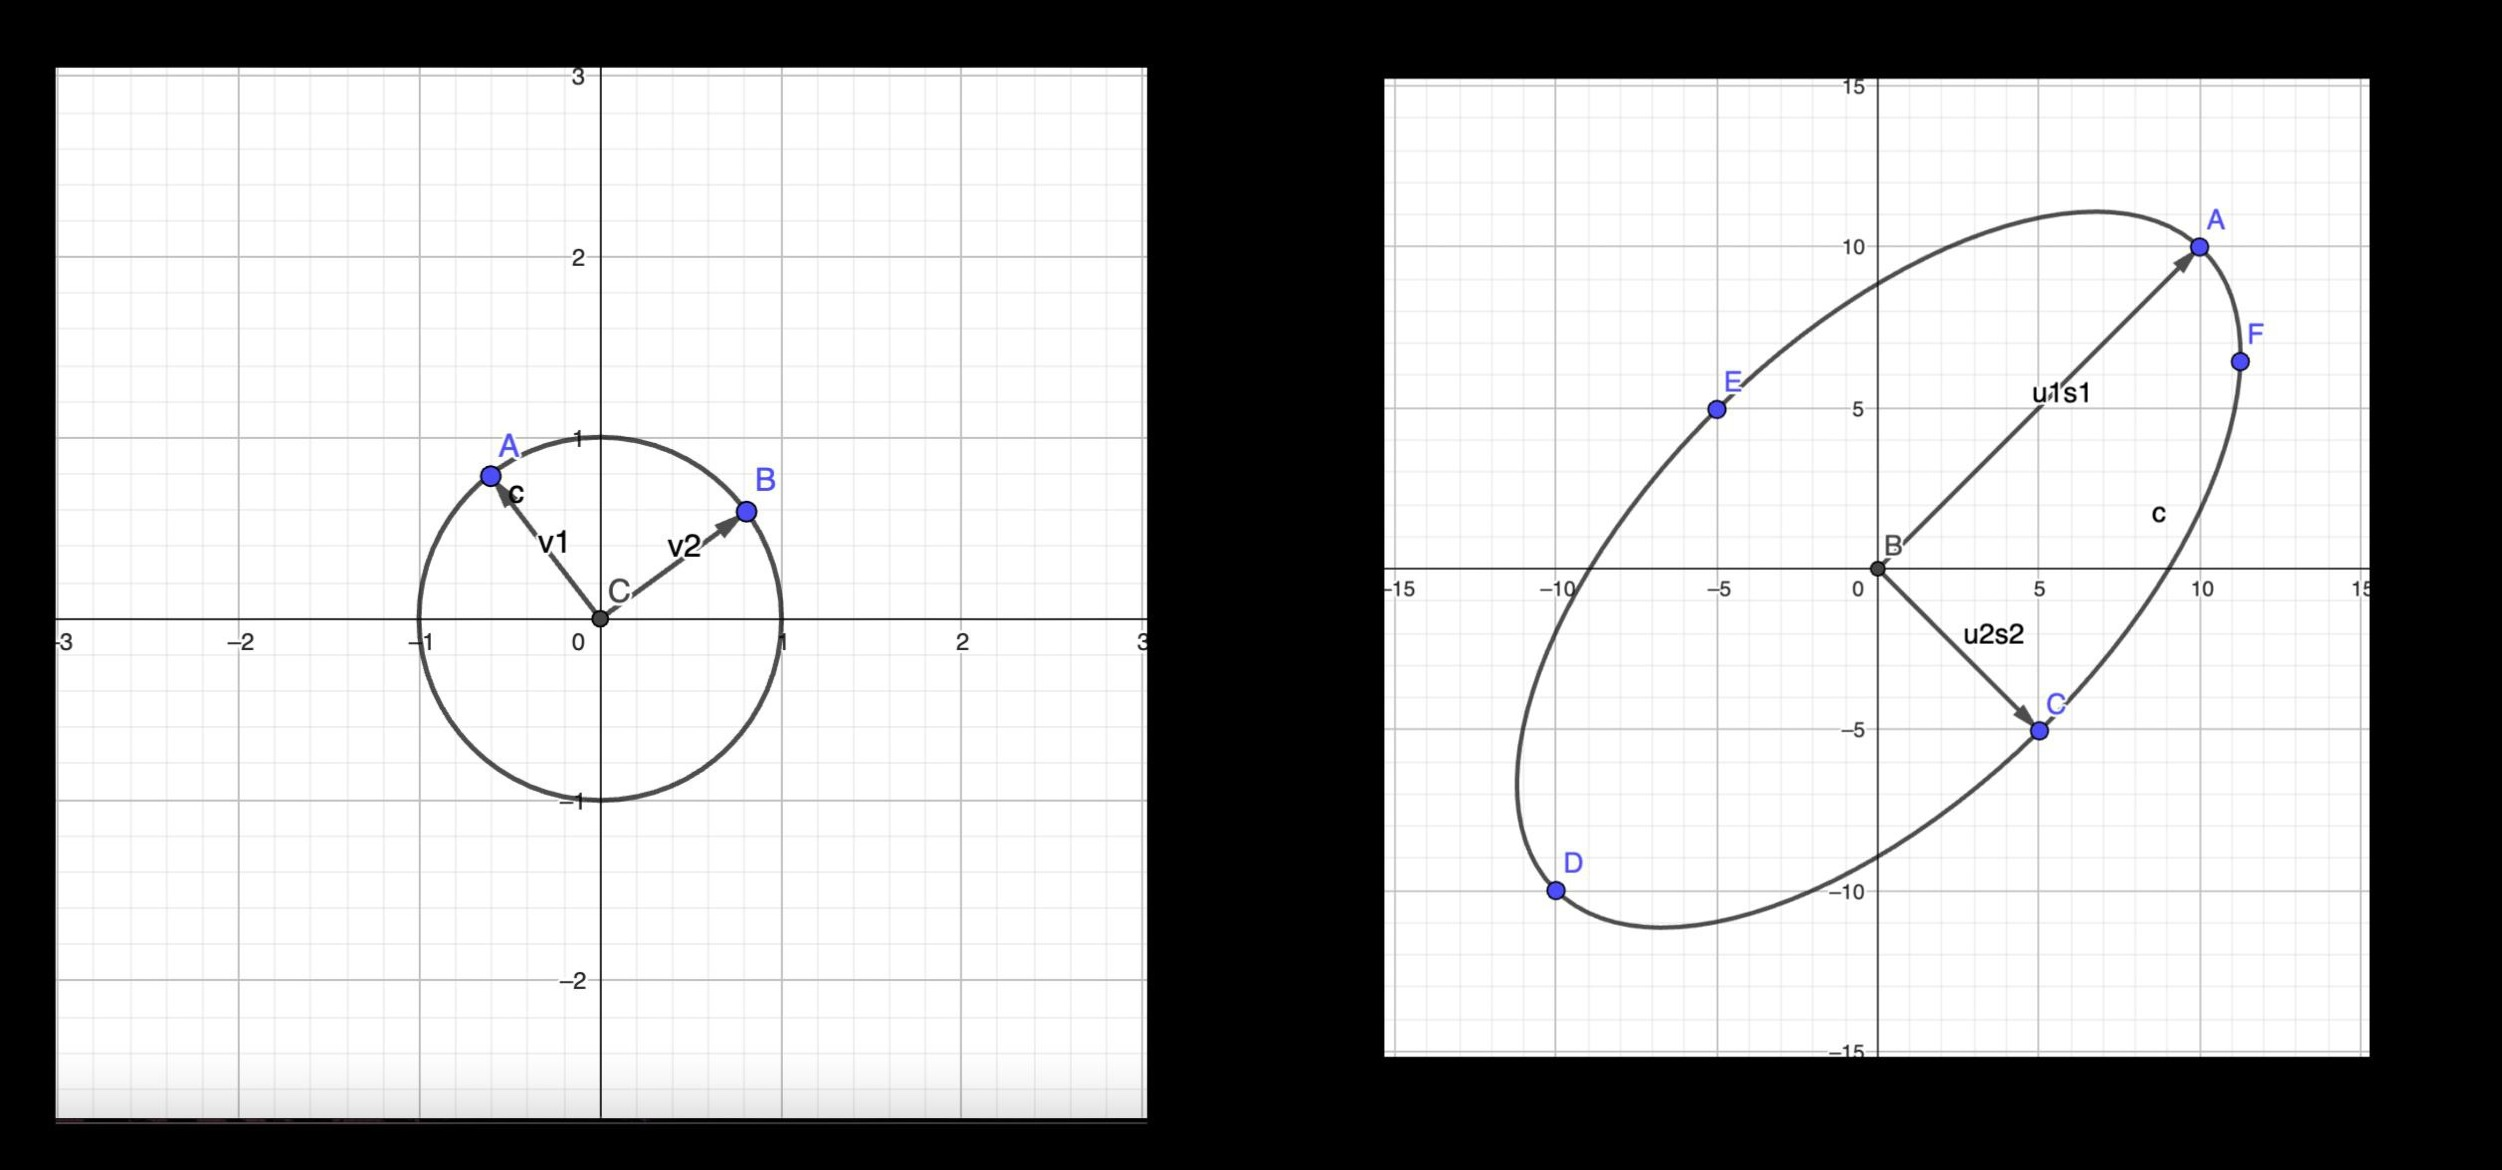


**• What are 2-norm and Frobenius norm of A**

- 2-norm equals to the lagest single value, in this case $||A||_2 = \sqrt{200}$
- $||A||_F = \sqrt{\sigma_1^2 + \sigma_2^2} = \sqrt{200 + 50} = 5\sqrt{10}$

• **Find A−1 not directly, but via SVD**.

$ A^{-1} = (U\Sigma V^T)^{-1} = (V^T)^{-1} \Sigma^{-1} U^{-1} =  V \Sigma^{-1} U^T$

In [14]:
# Matrix S^-1
S_inv = np.array([[1/S[0][0], 0], [0, 1/S[1][1]]])
sp.Matrix(S_inv)

Matrix([
[0.0707106781186548,                0],
[                 0, 0.14142135623731]])

In [15]:
# Find inverse Matrix via SVD
A_inv = V @ S_inv @ U.T
sp.Matrix(A_inv)

Matrix([
[0.05, -0.11],
[ 0.1, -0.02]])

In [16]:
# Check it's correct
sp.Matrix(la.inv(A))

Matrix([
[0.05, -0.11],
[ 0.1, -0.02]])


**• Find the eigenvalues λ1, λ2 of A**

$ \begin{vmatrix} A - \lambda I \end{vmatrix} = \begin{vmatrix} -2 - \lambda & 11\\ -10 & 5 - \lambda \end{vmatrix} = (-2 - \lambda)(5 - \lambda ) + 110 = \lambda^2 - 3 \lambda + 100 = 0$

$D = -391$

$\lambda = \frac{3\pm\sqrt{-391}}{2} $

$\lambda_1 = 1.5 + i\sqrt{97.75}$

$\lambda_2 = 1.5 - i\sqrt{97.75}$

# 4.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt


A = pd.read_hdf('./A.hdf').to_numpy()

Best approximation in terms of $ A_{ij} ≃ h_in_j $ will be if we take 1-dimensional single value decomposition $ A = U \Sigma V^T $ with $ h = U $ and $ n = \Sigma V^T $



In [24]:
k = 1

def get_approximation(A, k):
  u, s, vt = scipy.sparse.linalg.svds(A , k=k)
  h = u
  n = np.diag(s) @ vt
  return h @ n

A_approx = get_approximation(A, k)

Relative error of such approximation: $\sigma_{err} = \frac{\sqrt{∑_{ij}(A_{ij} - h_in_j)^2}}{\sqrt{∑_{ij}A_{ij}^2}} = \frac{||A - A_{approx}||_{F}}{|| A ||_{F}}$

In [25]:
def calc_error(A, A_approx):
  err = la.norm((A - A_approx), ord='fro')/la.norm(A, ord='fro')
  print(f'Error: {err}')
  return err

calc_error(A, A_approx)

Error: 0.7742251888975445


0.7742251888975445

For $ A_{ij} = \sum_{a=1}^K h_{ai}n_{aj} $ to be correct **$K$ should be equal to the number of non-zero single values of matrix $A$**

[5.00299422e+01 4.99770106e+01 2.54470684e+01 2.45000000e+01
 1.11294373e-14 9.58893463e-15 8.59907796e-15 4.99613766e-15
 4.99613766e-15 4.99613766e-15 4.99613766e-15 4.99613766e-15
 4.99613766e-15 4.99613766e-15 4.99613766e-15 4.99613766e-15
 4.99613766e-15 4.99613766e-15 4.99613766e-15 4.99613766e-15
 4.99613766e-15 4.99613766e-15 4.99613766e-15 4.99613766e-15
 4.99613766e-15 4.99613766e-15 4.99613766e-15 4.99613766e-15
 4.99613766e-15 4.99613766e-15 4.99613766e-15 4.99613766e-15
 4.99613766e-15 4.99613766e-15 4.99613766e-15 4.99613766e-15
 4.99613766e-15 4.99613766e-15 4.99613766e-15 4.99613766e-15
 4.99613766e-15 4.99613766e-15 4.99613766e-15 4.99613766e-15
 4.99613766e-15 4.99613766e-15 4.99613766e-15 3.68443644e-15
 3.22469577e-15 1.20479707e-15]


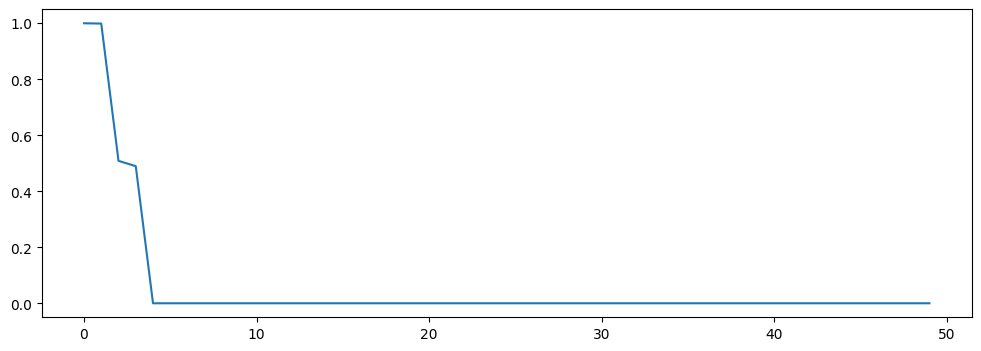

In [26]:
u, s, vt = la.svd(A)
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
print(s)
plt.plot(s/s[0])
plt.show()

So it will be enought to take **K = 4**

Lets verify it, error should be almost zero.

In [27]:
A_exact = get_approximation(A, 4)
calc_error(A, A_exact)

Error: 8.841777766346439e-16


8.841777766346439e-16

# **5.**

In [28]:
import pandas as pd
import h5py
import matplotlib.pyplot as plt

h5f = h5py.File('./digits.hdf', 'r')
keys = list(h5f.keys())
print(keys)

['images', 'labels']


In [46]:
digits_img = pd.read_hdf('./digits.hdf', key='images').to_numpy()
digits_labels = pd.read_hdf('./digits.hdf', key='labels').to_numpy()

digits_img = digits_img.reshape(digits_img.shape[0] // 8, 8, 8)
print(digits_labels.shape)
print(digits_img.shape)

(1797,)
(1797, 8, 8)


1620
879
1501


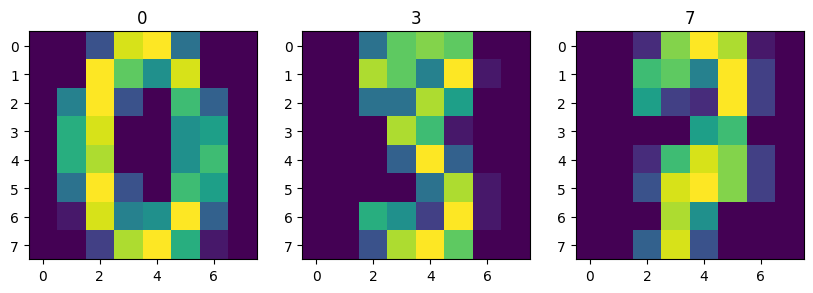

In [47]:
import random

def get_random_digit(digits_labels, d):
  return random.choice( [i for i, digit in enumerate(digits_labels) if digit == d ])

def print_digits(digits, indexes):
  fig = plt.figure(figsize=(10, 7))
  rows = 1
  columns = len(indexes)

  for num, idx in enumerate(indexes):
    print(idx)
    fig.add_subplot(rows, columns, num + 1)
    plt.imshow(digits[idx])
    plt.title(str(digits_labels[idx]))

zero = get_random_digit(digits_labels, 0)
three = get_random_digit(digits_labels, 3)
seven  = get_random_digit(digits_labels, 7)
print_digits(digits_img, [zero, three, seven])

1620
879
1501


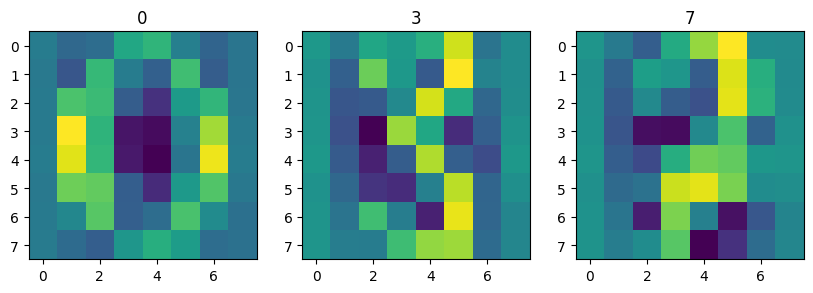

In [52]:
from sklearn.preprocessing import StandardScaler

# Normalize dataset
cnt = digits_img.shape[0]
digits_img_norm = StandardScaler().fit_transform(digits_img.reshape(cnt, 64)).reshape(cnt, 8, 8)

#digits_img_reshaped = digits_img.reshape(cnt, 64)
#digits_img_norm = ((digits_img_reshaped - np.mean(digits_img_reshaped)) / np.std(digits_img_reshaped)).reshape(cnt, 8, 8)

# Check correctness
print_digits(digits_img_norm, [zero, three, seven])

In [53]:
digits_img_norm.shape

(1797, 8, 8)

1620
879
1501


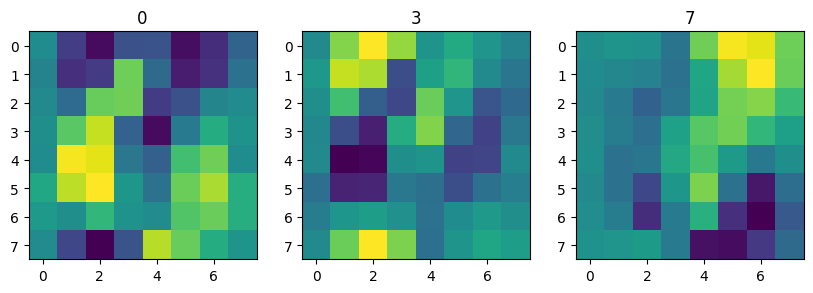

In [54]:
#Compress dataset onto 2 dimentions
dims = 2

def get_comression_and_projections(A, k):
  u, s, vt = la.svd(A)
  compression = u[:,:k] @ np.diag(s[:k]) @ vt[:k, :]
  projection = u[:,:k] @ np.diag(s[:k])
  return compression, projection

digits_dataset = digits_img_norm

dataset_reshaped = digits_dataset.reshape(digits_dataset.shape[0], 64)
compressions, projections = get_comression_and_projections(dataset_reshaped, dims)

compressions = compressions.reshape(digits_dataset.shape[0], 8, 8)
print_digits(compressions, [zero, three, seven])

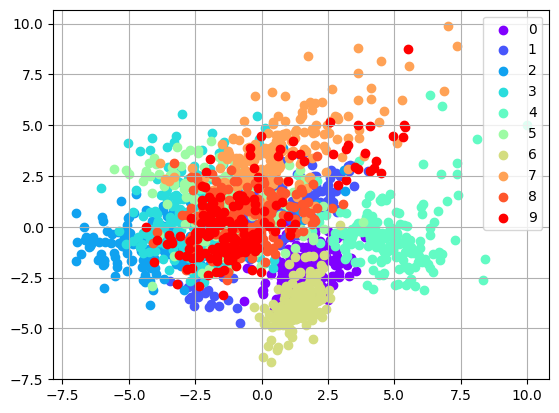

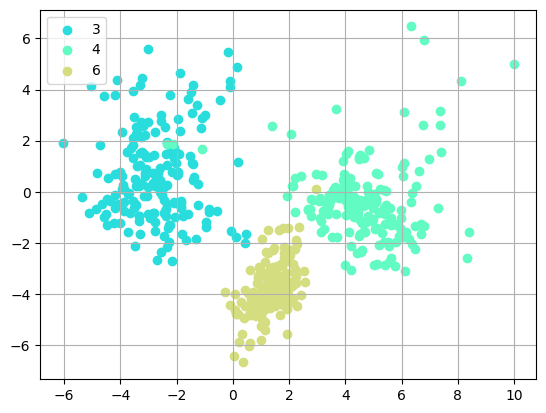

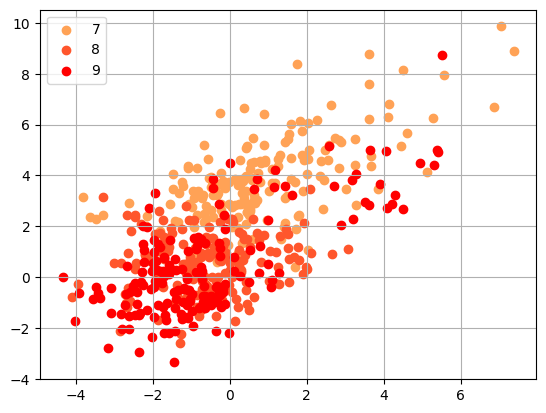

In [56]:
import matplotlib.cm as cm

def print_projections(projections, digits_labels, print_only=None):
    colors = cm.rainbow(np.linspace(0, 1, 10))
    labels = list(range(10))
    for label, color in zip(labels, colors):
        if print_only and label not in print_only:
          continue
        plt.scatter(projections[digits_labels == label, 0],
                    projections[digits_labels == label, 1],
                    label = label,
                    color = color)
    plt.legend(loc='best')
    plt.grid()
    plt.show()

print_projections(projections, digits_labels)
print_projections(projections, digits_labels, [3,4,6])
print_projections(projections, digits_labels, [7,8,9])

We can see that digits form distinct classes.

Some labels are clealy distinguished from others (like 3, 4 and 6), although there is a big intersection in the middle. Clearly 2 dimensions are not sufficient to properly compress 64 dimension.